In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "QUBIC"
tool_suffix = "QUBIC_QB"
n_runs = 1

parameters = (("r",[1,2,3,4,5,7,10]),
              ("q",[0.05,0.06,0.1,0.25,0.5,0.75]),
              ("c",[0.95,0.75,0.6,0.65,0.5,0.8,0.85,0.9]),
              ("P",["T","F"]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [4]:
true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/QUBIC/r=2.q=0.5.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.07392600226225027


In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.bic

File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB

File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.bicl

File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBI

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_res

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.b

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=F/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=F/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.b

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT.QUBIC_QB.bi

Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclu

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclus

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.bi

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.bi

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBI

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.bic

Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclus

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclus

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.1.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.1.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.1.c=0.75.P=F/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_r

File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.65.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.bic

File not found ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.9.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.9.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_re

File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_resul

File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.65.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_resu

File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_resu

Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.QUBIC_QB.biclus

File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.95.P=F/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_

File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.6.P=F/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_resul

File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.1.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_resul

File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.b

File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.6.P=T/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.bicl

Parameter combiations not found: 0
Successfull parameter combinations: 672
	files not found: 3456
	files empty: 0
	failed to parse: 3456
Total runs 13440
Non-zero runs: 9699


In [6]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

Total combinations: 672
[(1, 0.25, 0.6, 'F') (1, 0.25, 0.65, 'F') (2, 0.75, 0.75, 'F')
 (2, 0.75, 0.65, 'F') (1, 0.25, 0.6, 'T') (2, 0.75, 0.8, 'F')
 (1, 0.25, 0.65, 'T') (2, 0.75, 0.6, 'F') (1, 0.5, 0.8, 'F')
 (1, 0.5, 0.85, 'F') (1, 0.5, 0.75, 'F') (2, 0.75, 0.75, 'T')
 (2, 0.75, 0.65, 'T') (1, 0.25, 0.75, 'F') (1, 0.5, 0.9, 'F')
 (1, 0.5, 0.85, 'T') (2, 0.75, 0.6, 'T') (3, 0.75, 0.65, 'F')
 (1, 0.5, 0.75, 'T') (1, 0.5, 0.8, 'T')]
Top 20 paramter combinations


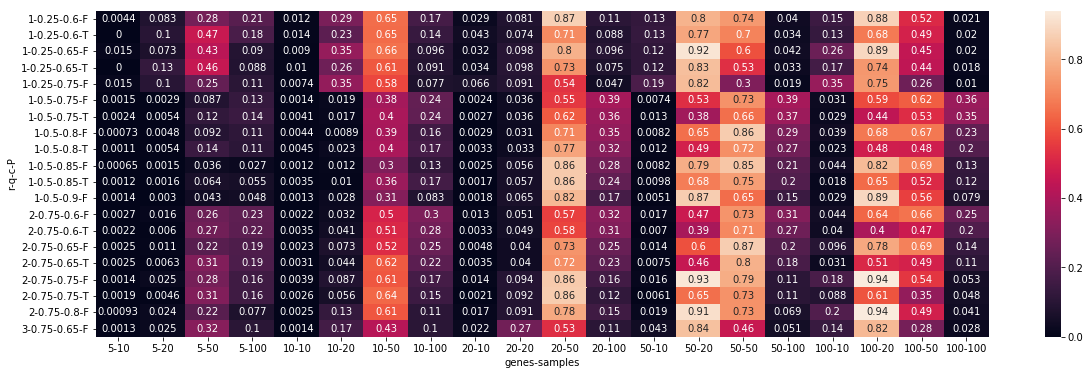

In [8]:
params = ["r","q","c","P"]
plot_file = img_outdir+"/" + tool_suffix+".J_rel.heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".J_rel.heatmap.tsv"

heatmap = plot_performance_heatmap(results,params,top=20,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [9]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

In [10]:
default_params = (1,0.06,0.95,"F")

In [11]:

r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 13440 runs considered

with Optimal parameters (Relevance --> max):
	r=1;
	q=0.25;
	c=0.6;
	P=F;
	Max. avg. Relevance: 0.304 ± 0.315
	Max. avg. Recovery: 0.27 ± 0.294
	Max. avg. n_biclusters: 10.0 ± 0.0
With Default parameters:
	r=1;
	q=0.06;
	c=0.95;
	P=F;
	avg. Relevance: 0.047 ± 0.056
	avg. Recovery: 0.033 ± 0.042
	avg. n_biclusters: 10.0 ± 0.0


Relevance                                      Recovery  \
                    mean       std count       max       min      mean   
r  q    c    P                                                           
1  0.25 0.60 F  0.303757  0.315050    20  0.877116  0.004442  0.269902   
        0.65 F  0.302925  0.315107    20  0.923323  0.008981  0.264954   
2  0.75 0.75 F  0.301090  0.338890    20  0.940898  0.001363  0.251855   
        0.65 F  0.284465  0.296769    20  0.865125  0.002313  0.242725   
1  0.25 0.60 T  0.283032  0.280779    20  0.772590  0.000000  0.257080   
2  0.75 0.80 F  0.280443  0.328133    20  0.937287  0.000935  0.240524   
1  0.25 0.65 T  0.273825  0.281291    20  0.833894  0.000000  0.242341   
2  0.75 0.60 F  0.271336  0.249649    20  0.733071  0.002247  0.239820   
1  0.50 0.80 F  0.265118  0.293538    20  0.860830  0.000727  0.227867   
        0.85 F  0.262267  0.333570    20  0.857376  0.000645  0.230184   
        0.75 F  0.255089  0.252315    20  0.728044  0.001379  0.215588   
2  0.75 0.75 T  0.249254  0.285781    20  0.862519  0.001911  0.210784   
        0.65 T  0.248734  0.261251    20  0.797977  0.002522  0.217290   
1  0.25 0.75 F  0.246329  0.250512    20  0.824088  0.007437  0.205297   
   0.50 0.90 F  0.240491  0.322412    20  0.891767  0.001342  0.208962   
        0.85 T  0.238528  0.290412    20  0.857376  0.001163  0.213990   
2  0.75 0.60 T  0.238240  0.219276    20  0.707671  0.002233  0.211196   
3  0.75 0.65 F  0.236979  0.257802    20  0.835673  0.001279  0.193341   
1  0.50 0.75 T  0.234950  0.224100    20  0.655177  0.002413  0.213633   
        0.80 T  0.233640  0.247875    20  0.769126  0.001054  0.209395   
   0.25 0.80 F  0.232902  0.232429    20  0.812000  0.007975  0.193793   
2  0.75 0.85 F  0.232069  0.288156    20  0.886068  0.000510  0.202255   
3  0.75 0.60 F  0.230439  0.267870    20  0.844458  0.001964  0.192860   
2  0.75 0.80 T  0.228708  0.273207    20  0.771434  0.000935  0.197486   
1  0.25 0.75 T  0.225702  0.214779    20  0.738018  0.000000  0.193507   
        0.50 F  0.214275  0.212805    20  0.622930  0.001370  0.179464   
3  0.75 0.60 T  0.209711  0.205387    20  0.713231  0.003834  0.176829   
1  0.50 0.90 T  0.208138  0.263266    20  0.788054  0.001125  0.187496   
3  0.75 0.75 F  0.205427  0.230035    20  0.792766  0.000782  0.173669   
        0.65 T  0.205407  0.219327    20  0.735148  0.002040  0.173977   
...                  ...       ...   ...       ...       ...       ...   
10 0.05 0.50 F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
7  0.05 0.75 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
        0.80 F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
10 0.06 0.60 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
        0.65 F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
7  0.05 0.90 F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
10 0.10 0.85 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
        0.80 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
        0.75 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
        0.65 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
        0.60 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
        0.50 T  0.000000  0.000000    20  0.000000  0.000000  0.000000   
             F  0.000000  0.000000    20  0.000000  0.000000  0.000000   
   0.06 0.95 T  0.0